In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## About The Dataset

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

### Features Dictionary

1.battery_power: Total energy a battery can store in one time measured in mAh

2.blue: Has bluetooth or not

3.clock_speed: speed at which microprocessor executes instructions

4.dual_sim: Has dual sim support or not

5.fc: Front Camera mega pixels

6.four_g: Has 4G or not

7.int_memory: Internal Memory in Gigabytes

8.m_dep: Mobile Depth in cm

9.mobile_wt: Weight of mobile phone

10.n_cores: Number of cores of processor

11.pc: Primary Camera mega pixels

12.px_height: Pixel Resolution Height

13.px_width: Pixel Resolution Width

14.ram: Random Access Memory in Mega Bytes

15.sc_h: Screen Height of mobile in cm

16.sc_w: Screen Width of mobile in cm

17.talk_time: longest time that a single battery charge will last 

18.three_g: Has 3G or not

19.touch_screen: Has touch screen or not

20.wifi: Has wifi or not

21.price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).                            

In [4]:
shape = train.shape
print("Number of Data Points in the datasets are: ", shape[0])
print("Number of Features in train dataset are:", shape[1])


Number of Data Points in the datasets are:  2000
Number of Features in train dataset are: 21


In [5]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


There are no NULL values in this dataset

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
dataDesc = []

for i in train.columns:
    dataDesc.append([
        i,
        train[i].dtypes,
        train[i].isnull().sum(),
        round((((train[i].isnull().sum()) / (len(train))) * 100), 2),
        train[i].nunique(),
        train[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,battery_power,int64,0,0.0,1094,"[1608, 1751]"
1,blue,int64,0,0.0,2,"[0, 1]"
2,clock_speed,float64,0,0.0,26,"[2.0, 1.0]"
3,dual_sim,int64,0,0.0,2,"[1, 0]"
4,fc,int64,0,0.0,20,"[13, 1]"
5,four_g,int64,0,0.0,2,"[0, 1]"
6,int_memory,int64,0,0.0,63,"[33, 37]"
7,m_dep,float64,0,0.0,10,"[0.8, 0.3]"
8,mobile_wt,int64,0,0.0,121,"[197, 128]"
9,n_cores,int64,0,0.0,8,"[2, 3]"


In [8]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# Handling Missing Values

In [9]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Exploratory Data Analysis

In [10]:
# Checking Target Variable Bias (Imbalance Or Not)
target = train['price_range'].value_counts()
target

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

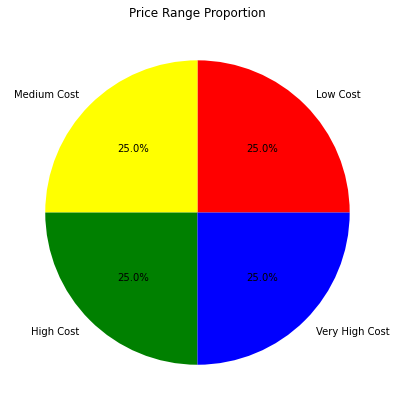

In [11]:
plt.figure(figsize=(7,7))
plt.title('Price Range Proportion')
plt.pie(target, labels =['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'], autopct = '%1.1f%%',colors=['Red','Yellow', 'Green', 'Blue'])
plt.show()

The Data is balanced with all of the target have the same amount of proportion

# Analysing Each Variable's Relationship with Target Variable

## 1. Battery Power

In [12]:
low = train[train['price_range'] == 0 ]
medium = train[train['price_range'] == 1 ]
high = train[train['price_range'] == 2 ]
very_high = train[train['price_range'] == 3 ]

In [13]:
low['battery_power'].describe()

count     500.000000
mean     1116.902000
std       410.801305
min       503.000000
25%       770.500000
50%      1066.000000
75%      1431.250000
max      1994.000000
Name: battery_power, dtype: float64

Text(0.5, 1.0, 'Battery Power Boxplot')

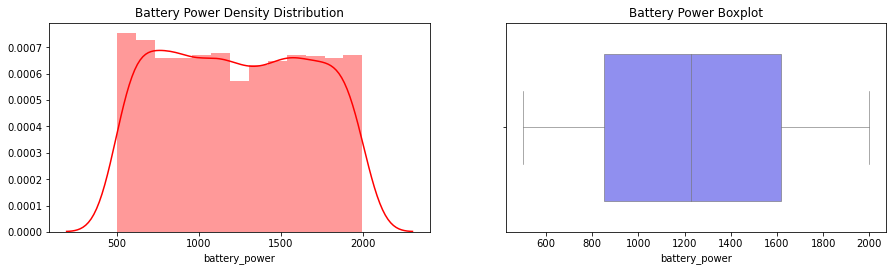

In [14]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['battery_power'], color = 'r')
plt.title('Battery Power Density Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['battery_power'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Battery Power Boxplot')

### Analyzing Battery Power on each price range

In [15]:
result_batteryp_per_pricer = train.groupby(by=train['price_range'])['battery_power'].mean().to_frame()
result_batteryp_per_pricer

,battery_power
price_range,
0,1116.902
1,1228.868
2,1228.320
3,1379.984


Text(0, 0.5, 'Average Battery Power')

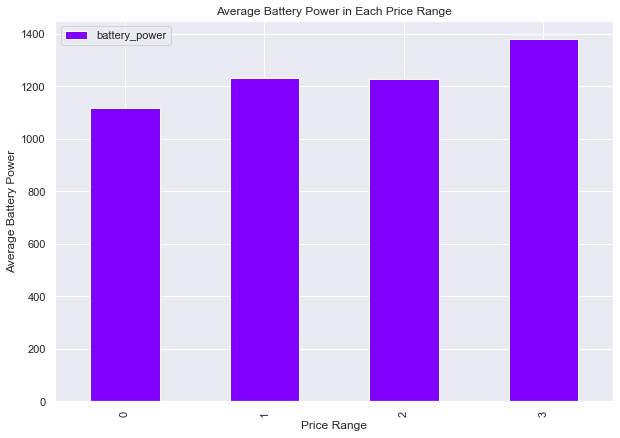

In [16]:
sns.set(rc={'figure.figsize':(10,7)})
bar_result_batteryp_per_pricer = result_batteryp_per_pricer.plot(kind='bar', colormap = 'rainbow')
bar_result_batteryp_per_pricer.set_title('Average Battery Power in Each Price Range')
bar_result_batteryp_per_pricer.set_xlabel('Price Range')
bar_result_batteryp_per_pricer.set_ylabel('Average Battery Power')

- Phones on the Highest class (Price Range : 3) has the highest average of Battery power
- Phones on the medium class (Price Range: 1) has a slight higher average battery power than phones on high class (Price Range : 2)

In [17]:
train['battery_power'].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

Text(0.5, 1.0, 'Battery Power Boxplot')

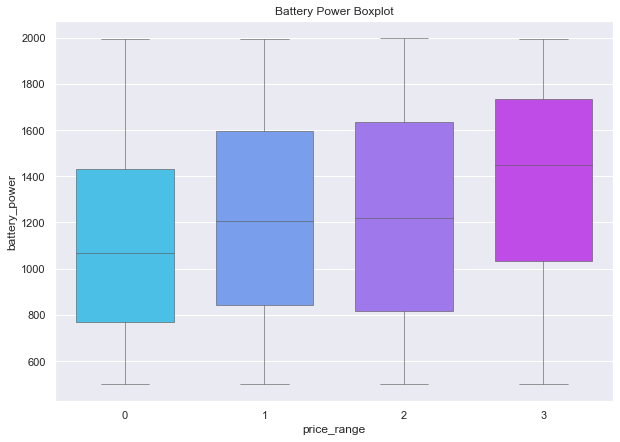

In [18]:
sns.boxplot(y=train['battery_power'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Battery Power Boxplot')

# 2. Bluetooth

In [19]:
blue = train['blue'].value_counts()
blue

0    1010
1     990
Name: blue, dtype: int64

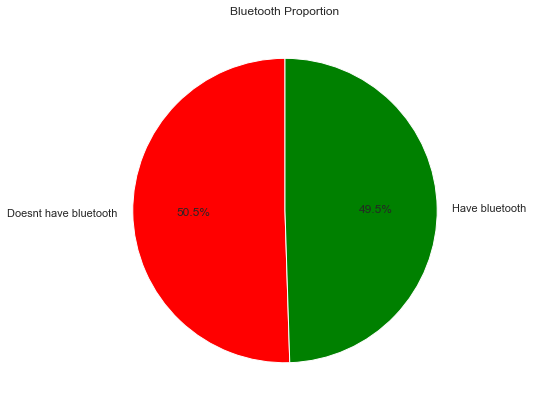

In [20]:
plt.figure(figsize=(7,7))
plt.title('Bluetooth Proportion')
plt.pie(blue, labels =['Doesnt have bluetooth', 'Have bluetooth'], autopct = '%1.1f%%',colors=['Red', 'Green'], startangle=90)
plt.show()

Half of the phones have bluetooth

### Analyzing bluetooth on each price range

In [21]:
result_bt_per_pricer = train.groupby(by=[train['price_range'], train['blue']])['blue'].size().to_frame()
result_bt_per_pricer

blue
price_range blue      
0           0      257
            1      243
1           0      255
            1      245
2           0      257
            1      243
3           0      241
            1      259

In [22]:
result_bt_per_pricer1 = (pd.crosstab(index=train['price_range'], columns=train['blue'], normalize='index')*100).round(2)
result_bt_per_pricer1

blue,0,1
price_range,,
0,51.4,48.6
1,51.0,49.0
2,51.4,48.6
3,48.2,51.8


In [23]:
groups_of_price = [0, 1, 2, 3]
groups_of_price

[0, 1, 2, 3]

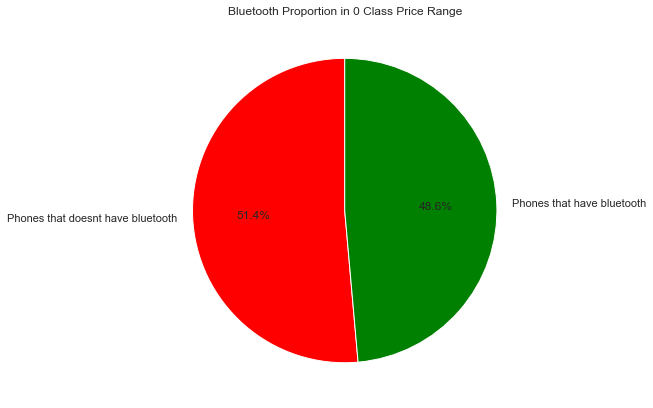

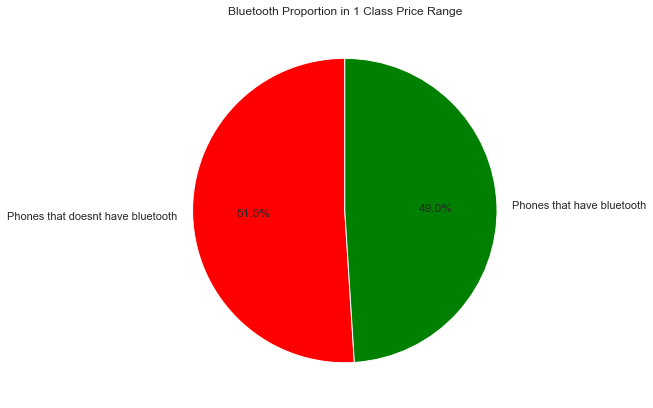

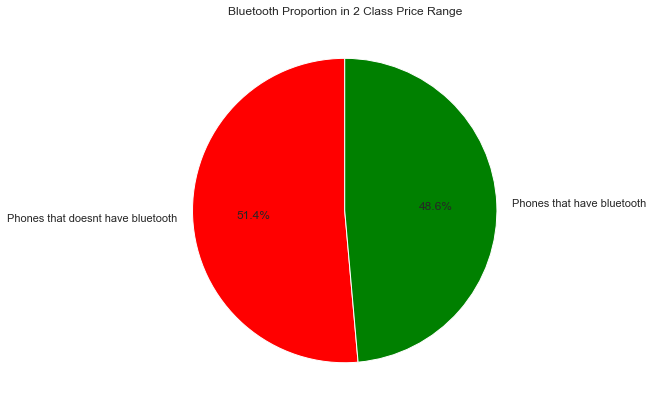

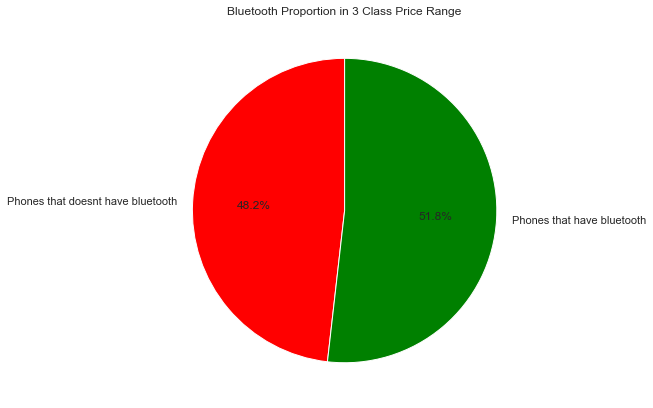

In [24]:
for i in groups_of_price:
    coba = train[train['price_range'] == i]
    result_bt_at_pricer = train.groupby(by=coba['blue'])['blue'].size()
    plt.title(f'Bluetooth Proportion in {i} Class Price Range')
    plt.pie(result_bt_at_pricer, labels = ['Phones that doesnt have bluetooth', 'Phones that have bluetooth'], autopct = '%1.1f%%',colors=['Red','Green'], startangle=90)
    plt.show()

Text(0.5, 1.0, 'Bluetooth Boxplot')

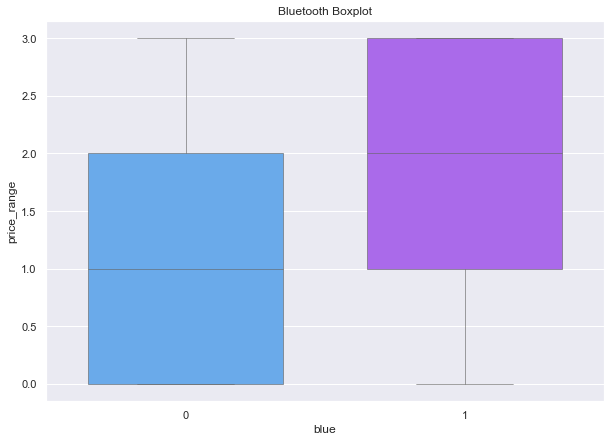

In [25]:
sns.boxplot(x=train['blue'], y=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Bluetooth Boxplot')

Phones that Bluetooth enabled are more costlier than the other phones

# 3. Clock Speed

In [26]:
train['clock_speed'].describe()

count    2000.000000
mean        1.522250
std         0.816004
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

In [27]:
train['clock_speed'].value_counts()

0.5    413
2.8     85
2.3     78
1.6     76
2.1     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
1.8     62
2.9     62
1.0     61
1.7     60
2.2     59
0.8     58
2.4     58
0.9     58
1.2     56
2.7     55
2.6     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

Text(0.5, 1.0, 'Clock Speed Power Boxplot')

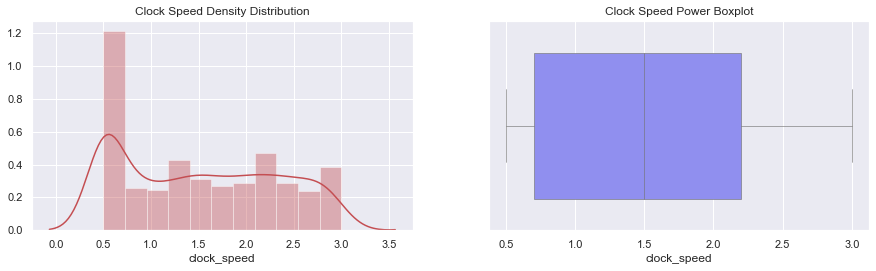

In [28]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['clock_speed'], color = 'r')
plt.title('Clock Speed Density Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['clock_speed'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Clock Speed Power Boxplot')

In [29]:
result_avg_clockspeed_per_pricer = train.groupby(by=train['price_range'])['clock_speed'].mean().to_frame()
result_avg_clockspeed_per_pricer

,clock_speed
price_range,
0,1.5502
1,1.4886
2,1.5298
3,1.5204


Text(0, 0.5, 'Average Clockspeed')

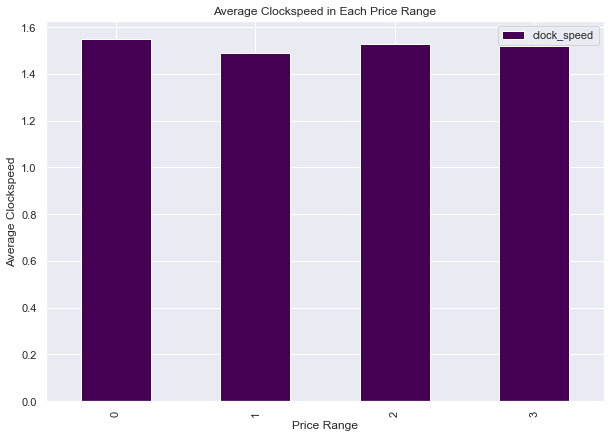

In [30]:
sns.set(rc={'figure.figsize':(10,7)})
bar_avg_clockspeed_per_pricer = result_avg_clockspeed_per_pricer.plot(kind='bar', colormap = 'viridis')
bar_avg_clockspeed_per_pricer.set_title('Average Clockspeed in Each Price Range')
bar_avg_clockspeed_per_pricer.set_xlabel('Price Range')
bar_avg_clockspeed_per_pricer.set_ylabel('Average Clockspeed')

all the phones in each price range almost has the same average clock speed

Text(0.5, 1.0, 'Clockspeed Boxplot')

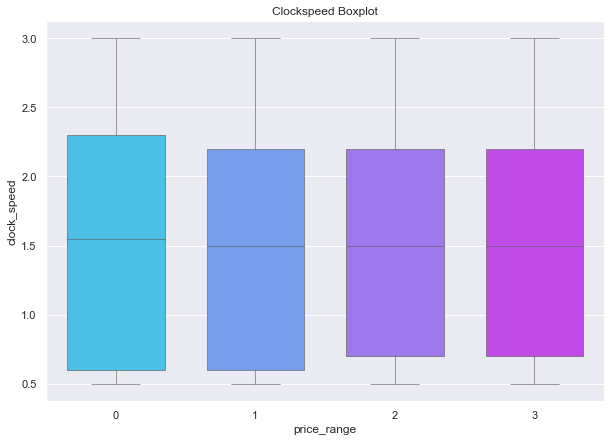

In [31]:
sns.boxplot(y=train['clock_speed'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Clockspeed Boxplot')

# 4. Dual Sim

In [32]:
dual_sim = train['dual_sim'].value_counts()
dual_sim

1    1019
0     981
Name: dual_sim, dtype: int64

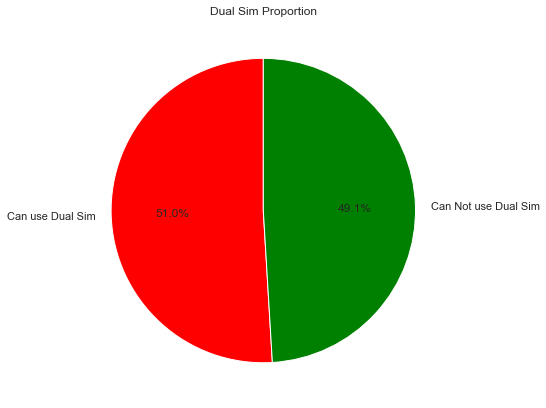

In [33]:
plt.figure(figsize=(7,7))
plt.title('Dual Sim Proportion')
plt.pie(dual_sim, labels =['Can use Dual Sim', 'Can Not use Dual Sim'], autopct = '%1.1f%%',colors=['Red', 'Green'], startangle=90)
plt.show()

In [34]:
result_ds_per_pricer = train.groupby(by=[train['price_range'], train['dual_sim']])['dual_sim'].size().to_frame()
result_ds_per_pricer

dual_sim
price_range dual_sim          
0           0              250
            1              250
1           0              245
            1              255
2           0              251
            1              249
3           0              235
            1              265

In [35]:
result_ds_per_pricer1 = (pd.crosstab(index=train['price_range'], columns=train['dual_sim'], normalize='index')*100).round(2)
result_ds_per_pricer1 

dual_sim,0,1
price_range,,
0,50.0,50.0
1,49.0,51.0
2,50.2,49.8
3,47.0,53.0


Text(0.5, 1.0, 'Dual SIM Boxplot')

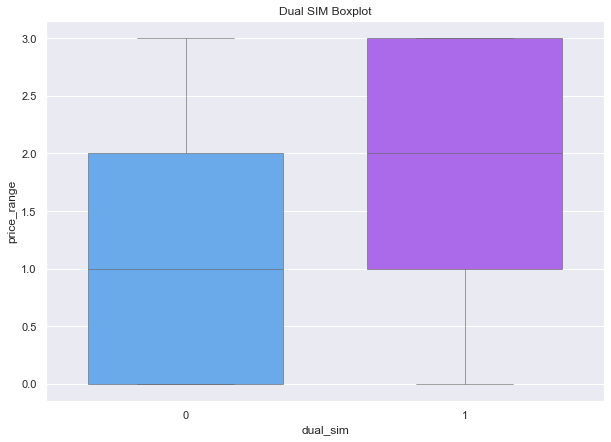

In [36]:
sns.boxplot(x=train['dual_sim'], y=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Dual SIM Boxplot')

- Phones with dual SIM are costlier than phones which doesnt

# 5. Fc (Front Camera Megapixels)

In [37]:
fc = train['fc'].value_counts()
fc

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

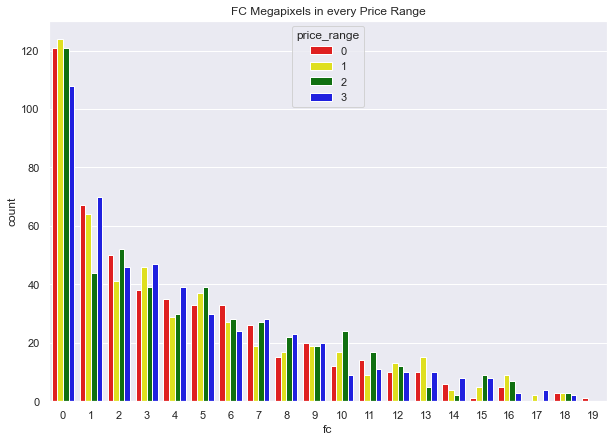

In [38]:
sns.countplot(train['fc'], hue = train['price_range'],palette=['Red','Yellow', 'Green', 'Blue'])
plt.title('FC Megapixels in every Price Range')
plt.show()

In [39]:
train[train['fc']==19]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1705,1290,1,1.4,1,19,1,35,0.3,110,4,20,405,742,879,16,2,8,1,0,0,0


- What's interesting is that the phone with highest megapixels is in category of LOW PRICE PHONES
- Also in HIGH PRICE phones there are phones with 0 megapixels in their front camera

Text(0.5, 1.0, 'Front Camera Megapixels Boxplot')

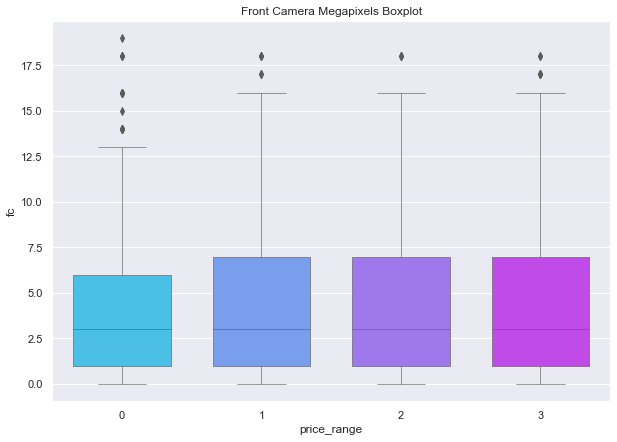

In [40]:
sns.boxplot(y=train['fc'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Front Camera Megapixels Boxplot')

# 6. Four-G

In [41]:
four_g = train['four_g'].value_counts()
four_g

1    1043
0     957
Name: four_g, dtype: int64

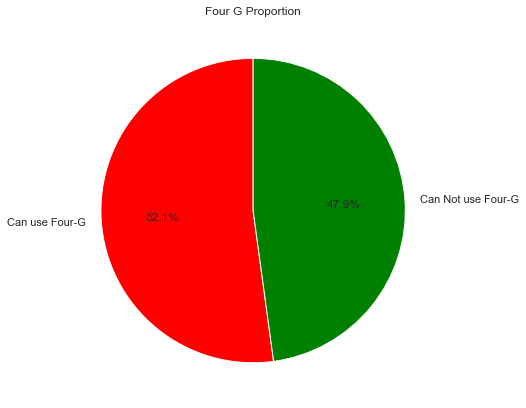

In [42]:
plt.figure(figsize=(7,7))
plt.title('Four G Proportion')
plt.pie(four_g, labels =['Can use Four-G', 'Can Not use Four-G'], autopct = '%1.1f%%',colors=['Red', 'Green'], startangle=90)
plt.show()

### Analyzing 4G on each price range

In [43]:
result_fg_per_pricer = train.groupby(by=[train['price_range'], train['four_g']])['four_g'].size().to_frame()
result_fg_per_pricer

four_g
price_range four_g        
0           0          241
            1          259
1           0          238
            1          262
2           0          253
            1          247
3           0          225
            1          275

In [44]:
result_fg_per_pricer1 = (pd.crosstab(index=train['price_range'], columns=train['four_g'], normalize='index')*100).round(2)
result_fg_per_pricer1 

four_g,0,1
price_range,,
0,48.2,51.8
1,47.6,52.4
2,50.6,49.4
3,45.0,55.0


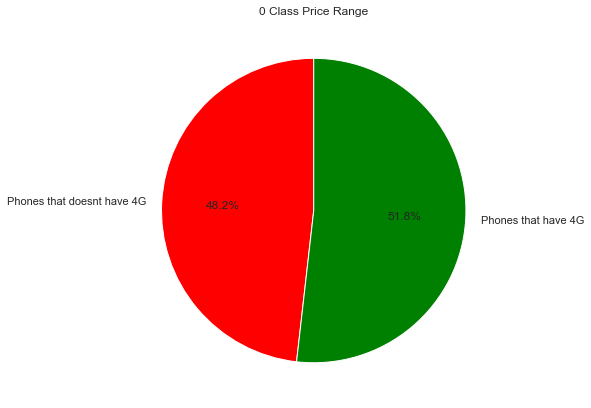

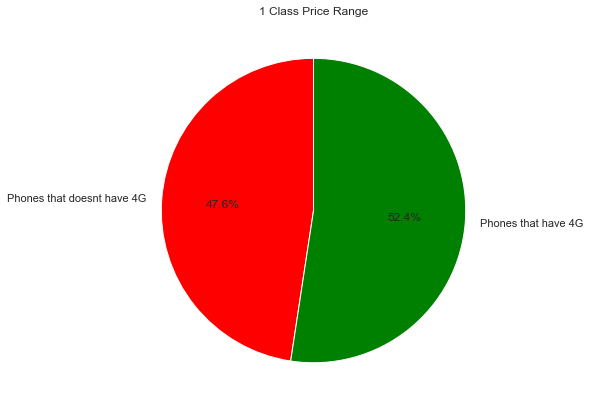

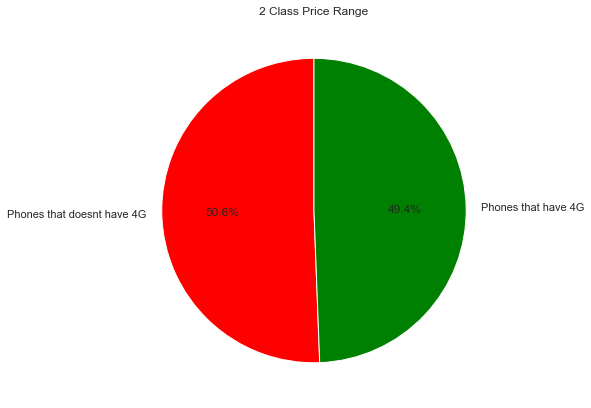

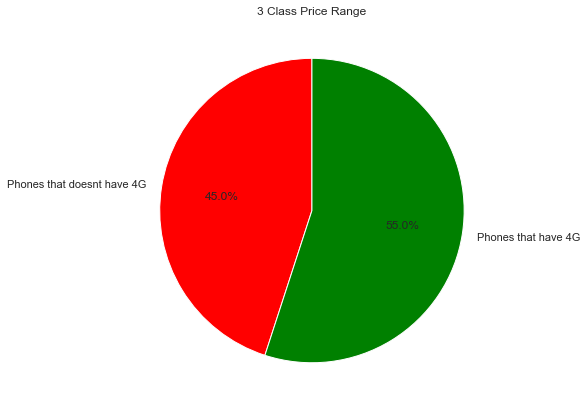

In [45]:
for i in groups_of_price:
    coba = train[train['price_range'] == i]
    result_fg_at_pricer = train.groupby(by=coba['four_g'])['four_g'].size()
    plt.title(f'{i} Class Price Range')
    plt.pie(result_fg_at_pricer, labels = ['Phones that doesnt have 4G', 'Phones that have 4G'], autopct = '%1.1f%%',colors=['Red','Green'], startangle=90)
    plt.show()

Text(0.5, 1.0, 'Four-G Boxplot')

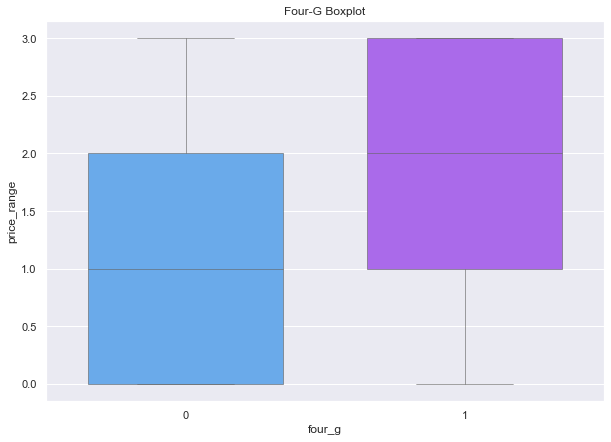

In [46]:
sns.boxplot(x=train['four_g'], y=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Four-G Boxplot')

- more phones on the highest class is able to use 4G
- Phones that 4g enabled are more costlier than the other phones

# 7.int_memory
- Internal Memory in Gigabytes

In [47]:
train['battery_power'].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

Text(0.5, 1.0, 'Internal Memory Boxplot')

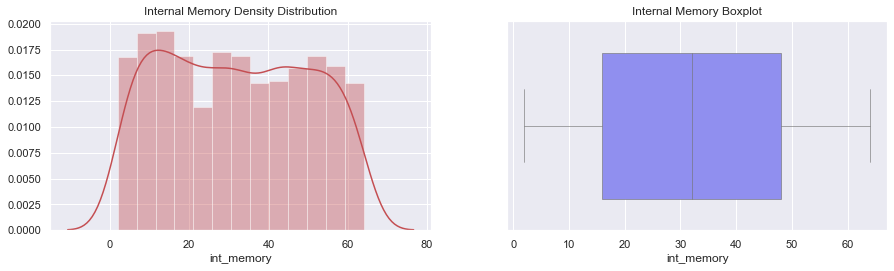

In [48]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['int_memory'], color = 'r')
plt.title('Internal Memory Density Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['int_memory'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Internal Memory Boxplot')

### Analyzing Internal Memory on each price range

In [49]:
result_intm_per_pricer = train.groupby(by=train['price_range'])['int_memory'].mean().to_frame()
result_intm_per_pricer

,int_memory
price_range,
0,31.174
1,32.116
2,30.920
3,33.976


Text(0, 0.5, 'Average Battery Power')

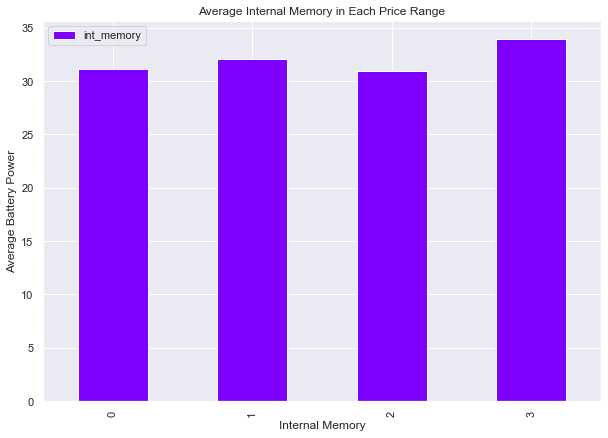

In [50]:
sns.set(rc={'figure.figsize':(10,7)})
bar_result_intm_per_pricer = result_intm_per_pricer.plot(kind='bar', colormap = 'rainbow')
bar_result_intm_per_pricer.set_title('Average Internal Memory in Each Price Range')
bar_result_intm_per_pricer.set_xlabel('Internal Memory')
bar_result_intm_per_pricer.set_ylabel('Average Battery Power')

Text(0.5, 1.0, 'Internal Memory Boxplot')

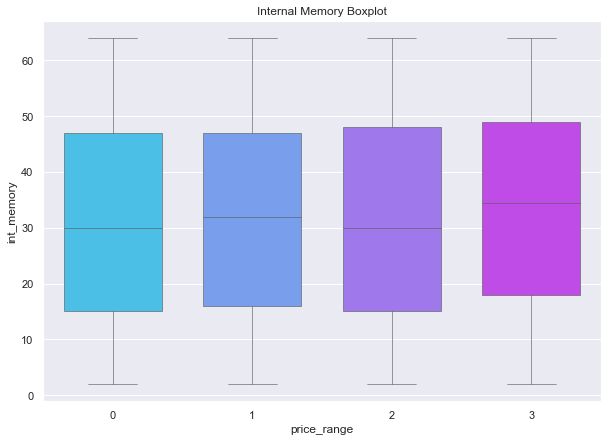

In [51]:
sns.boxplot(y=train['int_memory'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Internal Memory Boxplot')

# 8 m_dep
Mobile Depth in cm

In [52]:
m_dep = train['m_dep'].value_counts()
m_dep

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

In [53]:
train['m_dep'].describe()

count    2000.000000
mean        0.501750
std         0.288416
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

Text(0.5, 1.0, 'Mobile Depth Boxplot')

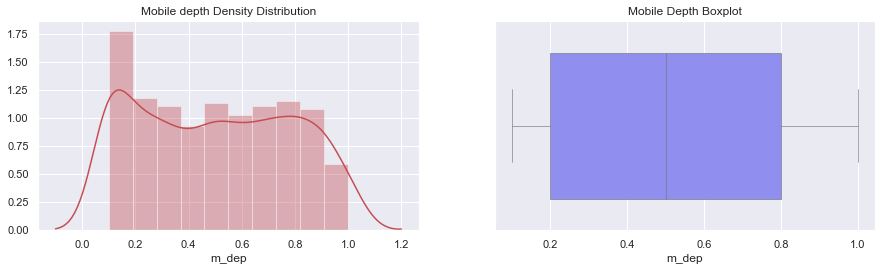

In [54]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['m_dep'], color = 'r')
plt.title('Mobile depth Density Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['m_dep'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Mobile Depth Boxplot')

### Analyzing Mobile Depth on each price range

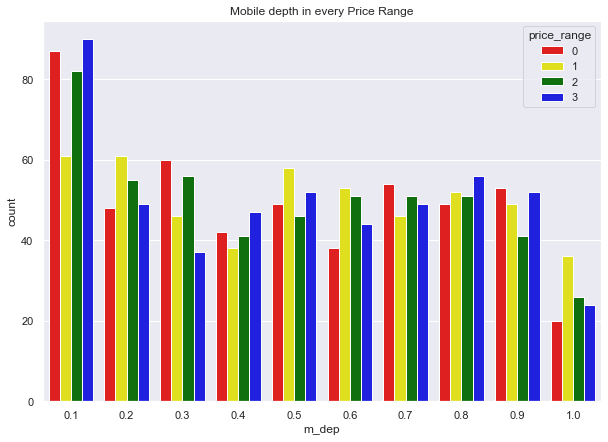

In [55]:
sns.countplot(train['m_dep'], hue = train['price_range'],palette=['Red','Yellow', 'Green', 'Blue'])
plt.title('Mobile depth in every Price Range')
plt.show()

In [56]:
result_avg_mdep_per_pricer = train.groupby(by=train['price_range'])['m_dep'].mean().to_frame()
result_avg_mdep_per_pricer

,m_dep
price_range,
0,0.4902
1,0.5240
2,0.4908
3,0.5020


Text(0.5, 1.0, 'Mobile Depth Boxplot')

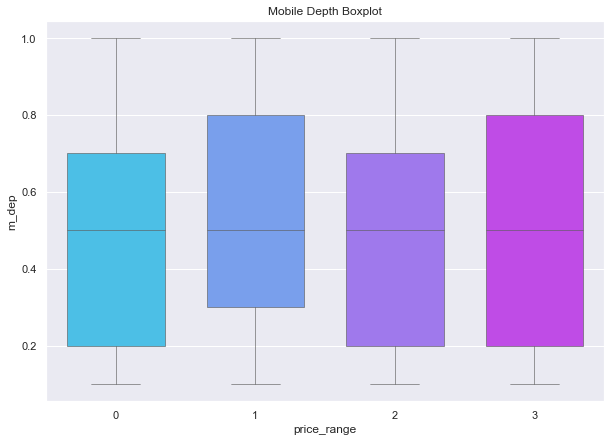

In [57]:
sns.boxplot(y=train['m_dep'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Mobile Depth Boxplot')

mobile depth doesnt have too much effect on price

# 9.mobile_wt
Weight of mobile phone

In [58]:
train['mobile_wt'].describe()

count    2000.000000
mean      140.249000
std        35.399655
min        80.000000
25%       109.000000
50%       141.000000
75%       170.000000
max       200.000000
Name: mobile_wt, dtype: float64

Text(0.5, 1.0, 'Mobile Weight Boxplot')

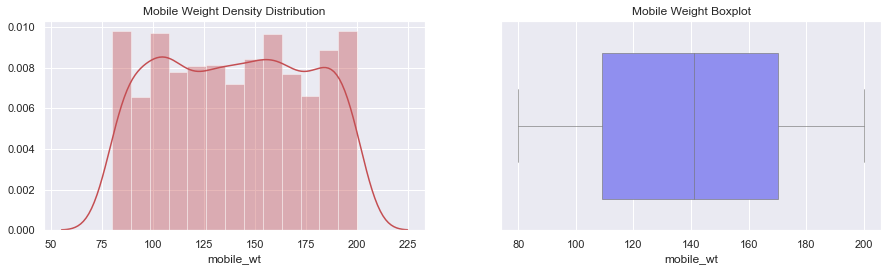

In [59]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['mobile_wt'], color = 'r')
plt.title('Mobile Weight Density Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['mobile_wt'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Mobile Weight Boxplot')

### Analyzing Mobile Weight on each price range

In [60]:
result_avg_mwt_per_pricer = train.groupby(by=train['price_range'])['mobile_wt'].mean().to_frame()
result_avg_mwt_per_pricer

,mobile_wt
price_range,
0,140.552
1,140.510
2,143.614
3,136.320


Text(0.5, 1.0, 'Mobile Weight Boxplot')

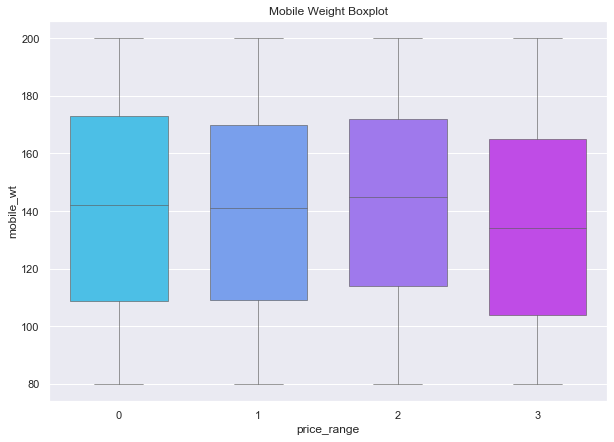

In [61]:
sns.boxplot(y=train['mobile_wt'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Mobile Weight Boxplot')

mobile weigth doesnt have too much effect on price

# 10.n_cores 
Number of cores of processor

In [62]:
n_cores = train['n_cores'].value_counts()
n_cores

4    274
7    259
8    256
2    247
5    246
3    246
1    242
6    230
Name: n_cores, dtype: int64

### Analyzing N_cores on each price range

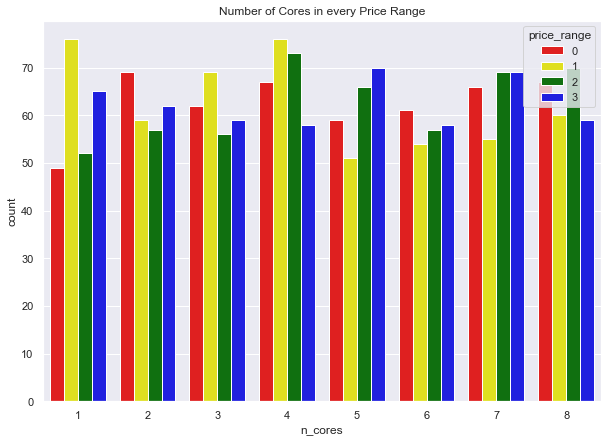

In [63]:
sns.countplot(train['n_cores'], hue = train['price_range'],palette=['Red','Yellow', 'Green', 'Blue'])
plt.title('Number of Cores in every Price Range')
plt.show()

Turns out there are also many phones at Low Price Range with high Number of Cores 

In [64]:
result_nc_per_pricer = train.groupby(by=[train['price_range'], train['n_cores']])['n_cores'].size().to_frame()
result_nc_per_pricer

n_cores
price_range n_cores         
0           1             49
            2             69
            3             62
            4             67
            5             59
            6             61
            7             66
            8             67
1           1             76
            2             59
            3             69
            4             76
            5             51
            6             54
            7             55
            8             60
2           1             52
            2             57
            3             56
            4             73
            5             66
            6             57
            7             69
            8             70
3           1             65
            2             62
            3             59
            4             58
            5             70
            6             58
            7             69
            8             59

Text(0.5, 1.0, 'Number of Cores Boxplot')

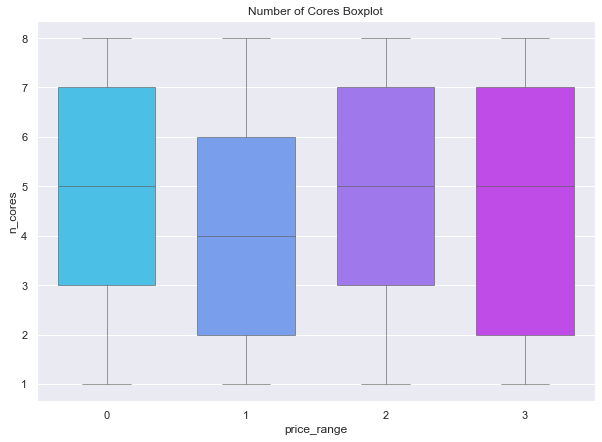

In [65]:
sns.boxplot(y=train['n_cores'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Number of Cores Boxplot')

n_cores doesnt have too much effect on price

# 11.pc
Primary Camera mega pixels

In [66]:
train['pc'].value_counts()

10    122
7     119
9     112
20    110
14    104
1     104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64

### Analyzing Primary Camera Megapixels on each price range

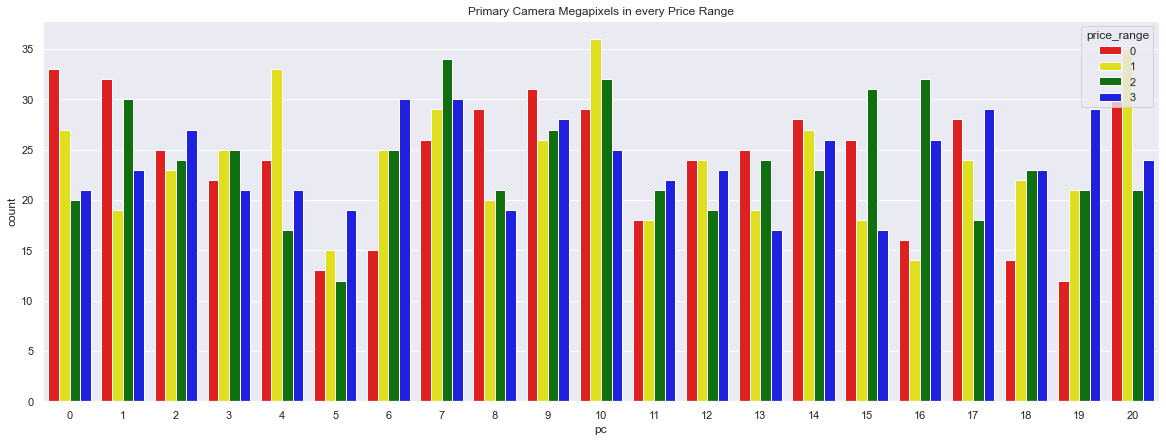

In [67]:
plt.figure(figsize=(20, 7))
sns.countplot(train['pc'], hue = train['price_range'],palette=['Red','Yellow', 'Green', 'Blue'])
plt.title('Primary Camera Megapixels in every Price Range')
plt.show()

Text(0.5, 1.0, 'Primary Camera Megapixels Boxplot')

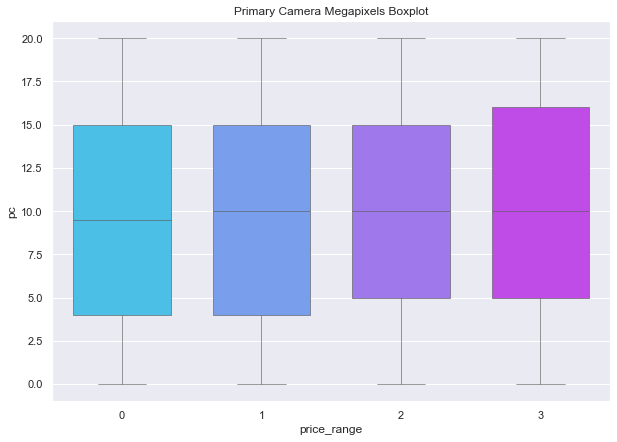

In [68]:
sns.boxplot(y=train['pc'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Primary Camera Megapixels Boxplot')

primary camera megapixels doesnt have too much effect on price

# 12.px_height 
Pixel Resolution Height

In [69]:
train['px_height'].describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

Text(0.5, 1.0, 'Pixel Resolution Height Boxplot')

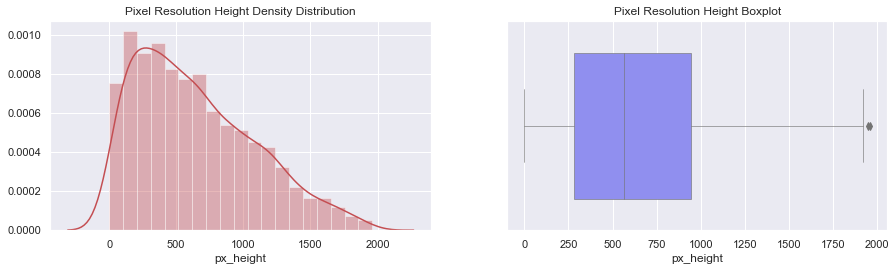

In [70]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['px_height'], color = 'r')
plt.title('Pixel Resolution Height Density Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['px_height'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Pixel Resolution Height Boxplot')

### Analyzing Pixel Resolution Height on each price range

In [71]:
result_avg_pxh_per_pricer = train.groupby(by=train['price_range'])['px_height'].mean().to_frame()
result_avg_pxh_per_pricer

,px_height
price_range,
0,536.408
1,666.892
2,632.284
3,744.848


Text(0, 0.5, 'Average Pixel Resolution Height')

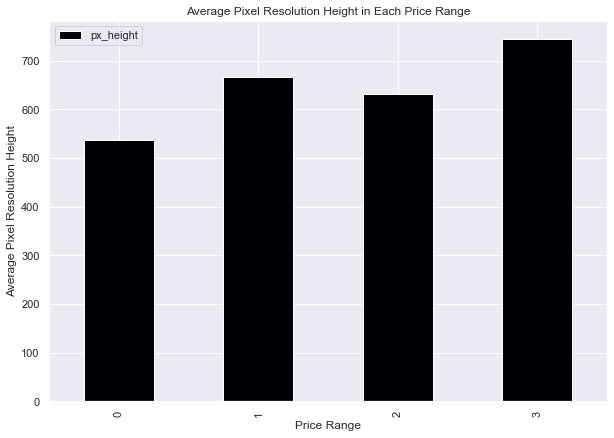

In [72]:
sns.set(rc={'figure.figsize':(10,7)})
bar_result_pxh_per_pricer = result_avg_pxh_per_pricer.plot(kind='bar', colormap = 'magma')
bar_result_pxh_per_pricer.set_title('Average Pixel Resolution Height in Each Price Range')
bar_result_pxh_per_pricer.set_xlabel('Price Range')
bar_result_pxh_per_pricer.set_ylabel('Average Pixel Resolution Height')

Text(0.5, 1.0, 'Pixel Resolution Height Boxplot')

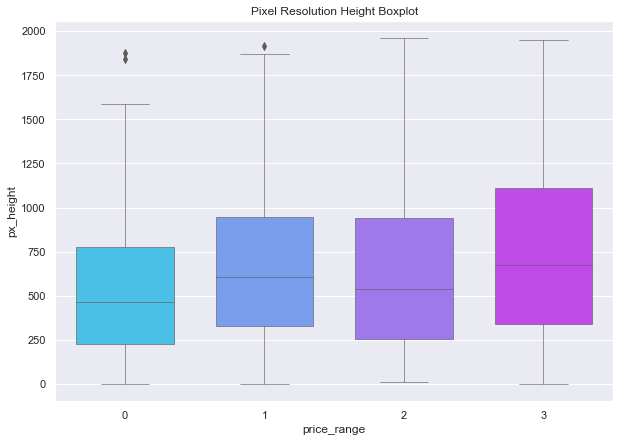

In [73]:
sns.boxplot(y=train['px_height'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Pixel Resolution Height Boxplot')

pixels height have a slight effect on price

# 13.px_width 
Pixel Resolution Width

In [74]:
train['px_width'].describe()

count    2000.000000
mean     1251.515500
std       432.199447
min       500.000000
25%       874.750000
50%      1247.000000
75%      1633.000000
max      1998.000000
Name: px_width, dtype: float64

Text(0.5, 1.0, 'Pixel Resolution Width Boxplot')

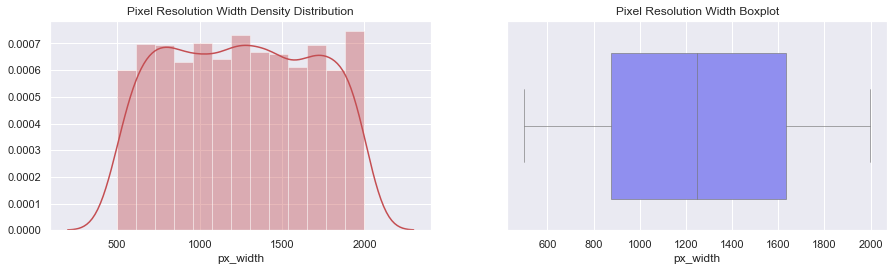

In [75]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['px_width'], color = 'r')
plt.title('Pixel Resolution Width Density Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['px_width'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Pixel Resolution Width Boxplot')

In [76]:
### Analyzing Pixel Resolution Width on each price range

In [77]:
result_avg_pxw_per_pricer = train.groupby(by=train['price_range'])['px_width'].mean().to_frame()
result_avg_pxw_per_pricer

,px_width
price_range,
0,1150.270
1,1251.908
2,1234.046
3,1369.838


Text(0, 0.5, 'Average Pixel Resolution Width')

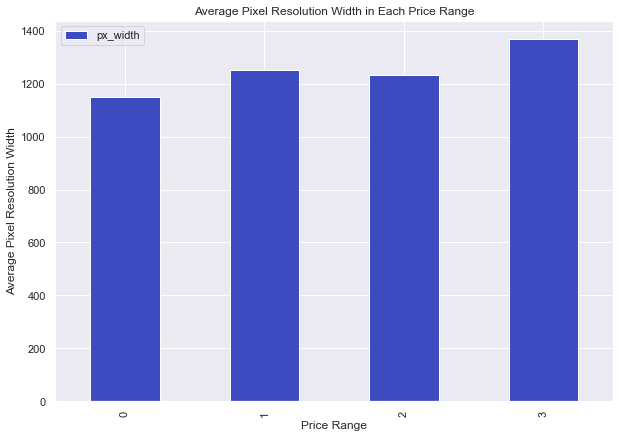

In [78]:
sns.set(rc={'figure.figsize':(10,7)})
bar_result_pxw_per_pricer = result_avg_pxw_per_pricer.plot(kind='bar', colormap = 'coolwarm')
bar_result_pxw_per_pricer.set_title('Average Pixel Resolution Width in Each Price Range')
bar_result_pxw_per_pricer.set_xlabel('Price Range')
bar_result_pxw_per_pricer.set_ylabel('Average Pixel Resolution Width')

Text(0.5, 1.0, 'Pixel Resolution Width Boxplot')

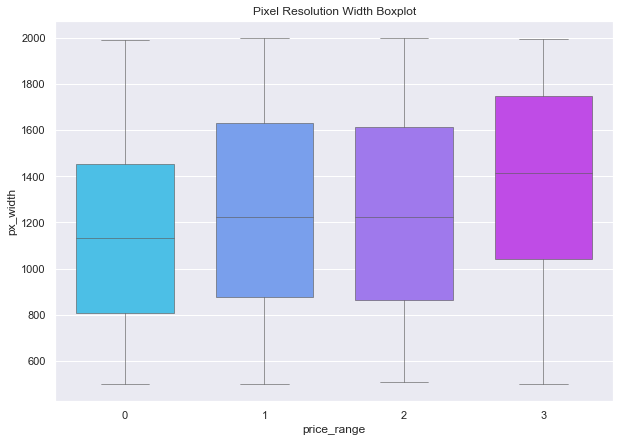

In [79]:
sns.boxplot(y=train['px_width'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Pixel Resolution Width Boxplot')

same with its height, pixels width also have a slight effect on price

# 14.ram 
Random Access Memory in Mega Bytes

In [80]:
train['ram'].describe()

count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64

Text(0.5, 1.0, 'RAM Boxplot')

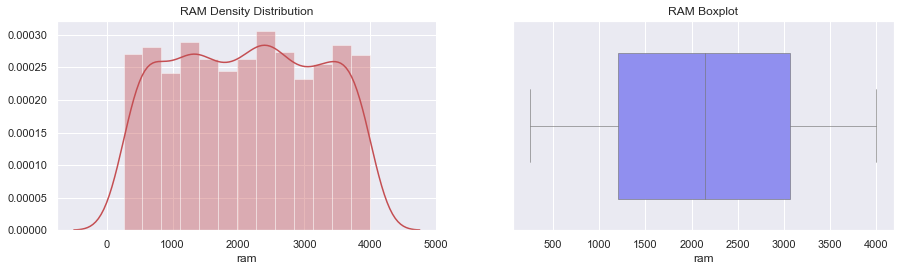

In [81]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['ram'], color = 'r')
plt.title('RAM Density Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['ram'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('RAM Boxplot')

In [82]:
### Analyzing RAM on each price range

In [83]:
result_avg_ram_per_pricer = train.groupby(by=train['price_range'])['ram'].mean().to_frame()
result_avg_ram_per_pricer

,ram
price_range,
0,785.314
1,1679.490
2,2582.816
3,3449.232


Text(0, 0.5, 'Average RAM')

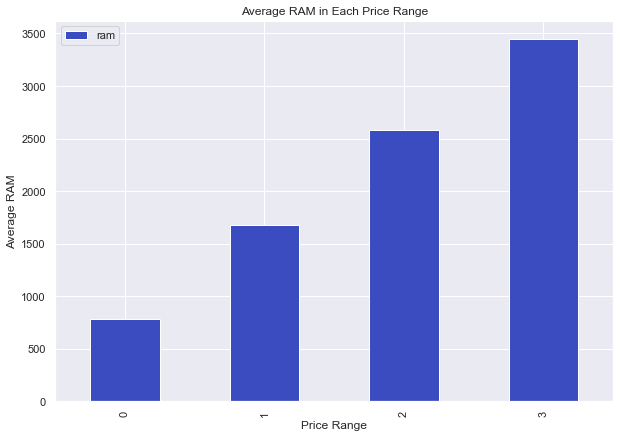

In [84]:
sns.set(rc={'figure.figsize':(10,7)})
bar_result_ram_per_pricer = result_avg_ram_per_pricer.plot(kind='bar', colormap = 'coolwarm')
bar_result_ram_per_pricer.set_title('Average RAM in Each Price Range')
bar_result_ram_per_pricer.set_xlabel('Price Range')
bar_result_ram_per_pricer.set_ylabel('Average RAM')

Text(0.5, 1.0, 'RAM Boxplot in each price range')

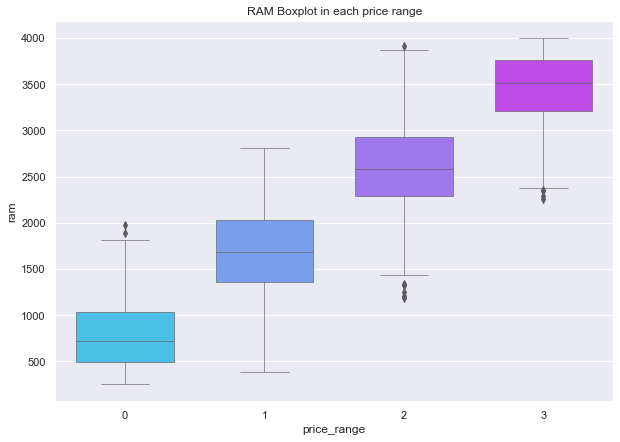

In [85]:
sns.boxplot(y=train['ram'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('RAM Boxplot in each price range')

# 15.sc_h 
Screen Height of mobile in cm

In [86]:
train['sc_h'].describe()

count    2000.000000
mean       12.306500
std         4.213245
min         5.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        19.000000
Name: sc_h, dtype: float64

Text(0.5, 1.0, 'Screen Height Boxplot')

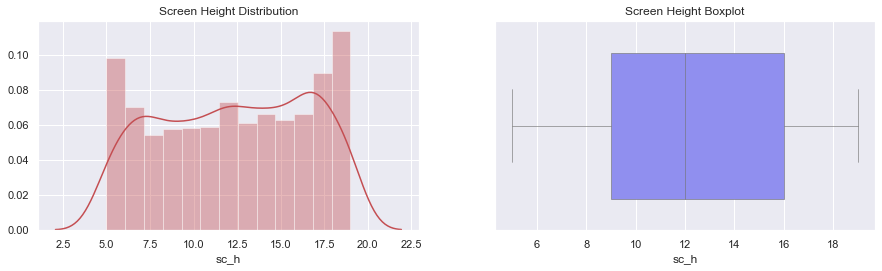

In [87]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['sc_h'], color = 'r')
plt.title('Screen Height Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['sc_h'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Screen Height Boxplot')

In [88]:
### Analyzing Screen Height on each price range

In [89]:
result_avg_sch_per_pricer = train.groupby(by=train['price_range'])['sc_h'].mean().to_frame()
result_avg_sch_per_pricer

,sc_h
price_range,
0,12.324
1,12.212
2,12.010
3,12.680


Text(0, 0.5, 'Average Screen Height')

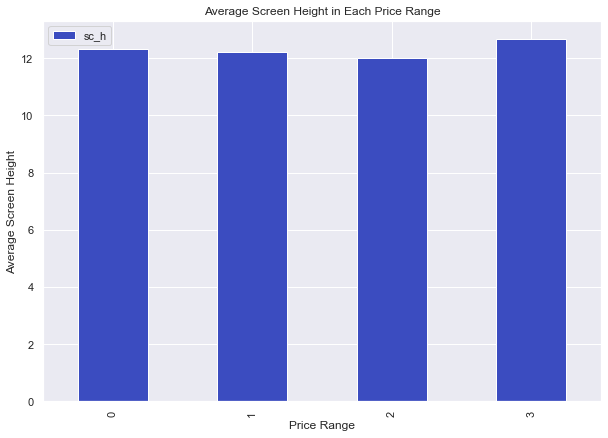

In [90]:
sns.set(rc={'figure.figsize':(10,7)})
bar_result_sch_per_pricer = result_avg_sch_per_pricer.plot(kind='bar', colormap = 'coolwarm')
bar_result_sch_per_pricer.set_title('Average Screen Height in Each Price Range')
bar_result_sch_per_pricer.set_xlabel('Price Range')
bar_result_sch_per_pricer.set_ylabel('Average Screen Height')

Text(0.5, 1.0, 'Screen Height Boxplot in each price range')

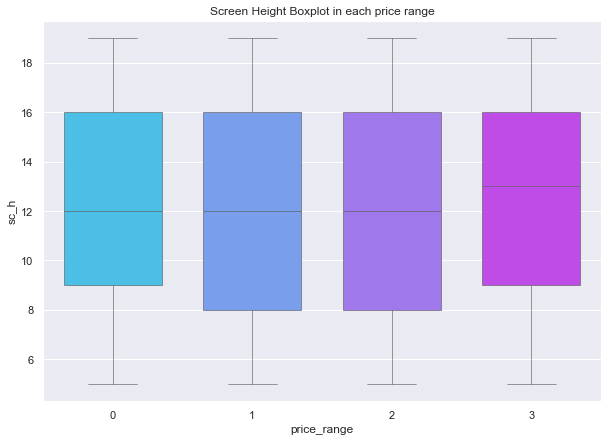

In [93]:
sns.boxplot(y=train['sc_h'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Screen Height Boxplot in each price range')

Screen Height doesnt have too much effect on price

# 16.sc_w 
Screen Width of mobile in cm

In [94]:
train['sc_w'].describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

Text(0.5, 1.0, 'Screen Width Boxplot')

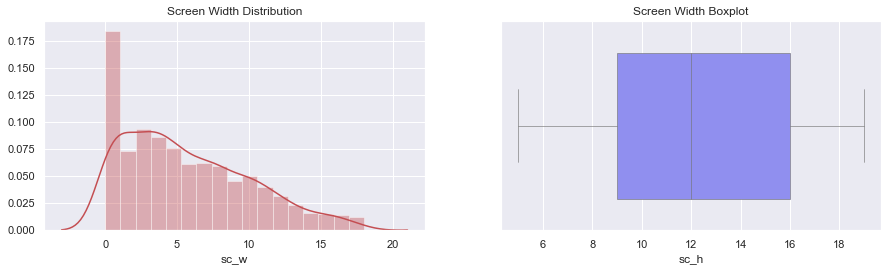

In [95]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['sc_w'], color = 'r')
plt.title('Screen Width Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['sc_h'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Screen Width Boxplot')

In [96]:
### Analyzing Screen Width on each price range

In [97]:
result_avg_scw_per_pricer = train.groupby(by=train['price_range'])['sc_w'].mean().to_frame()
result_avg_scw_per_pricer

,sc_w
price_range,
0,5.682
1,5.544
2,5.714
3,6.128


Text(0, 0.5, 'Average Screen Width')

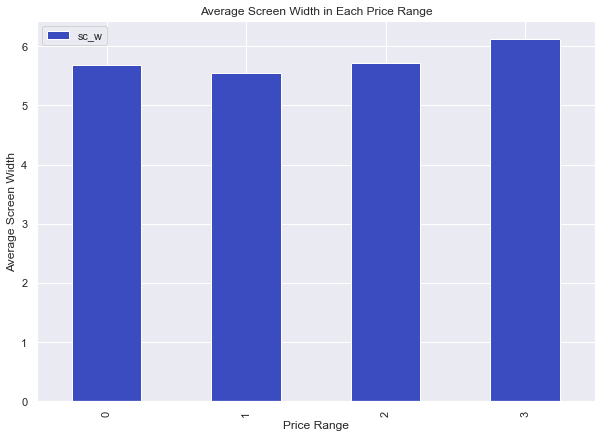

In [98]:
sns.set(rc={'figure.figsize':(10,7)})
bar_result_scw_per_pricer = result_avg_scw_per_pricer.plot(kind='bar', colormap = 'coolwarm')
bar_result_scw_per_pricer.set_title('Average Screen Width in Each Price Range')
bar_result_scw_per_pricer.set_xlabel('Price Range')
bar_result_scw_per_pricer.set_ylabel('Average Screen Width')

Text(0.5, 1.0, 'Screen Width Boxplot in each price range')

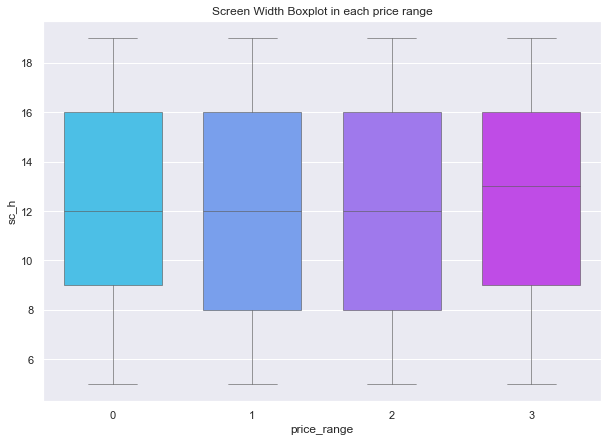

In [101]:
sns.boxplot(y=train['sc_h'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Screen Width Boxplot in each price range')

Screen Width doesnt have too much effect on price

# 17.talk_time
longest time that a single battery charge will last 

In [102]:
train['talk_time'].describe()

count    2000.000000
mean       11.011000
std         5.463955
min         2.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: talk_time, dtype: float64

Text(0.5, 1.0, 'Talk Time Boxplot')

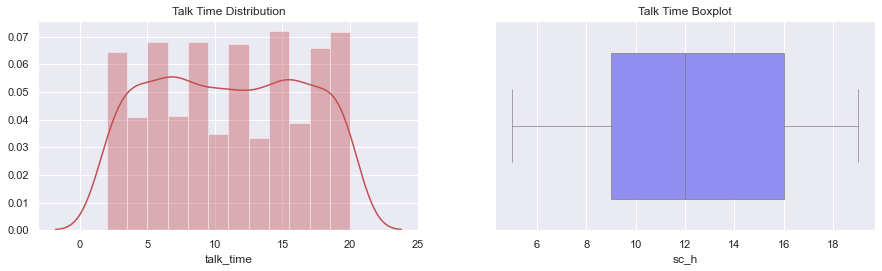

In [103]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['talk_time'], color = 'r')
plt.title('Talk Time Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['sc_h'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Talk Time Boxplot')

In [104]:
### Analyzing Talk Time on each price range

In [105]:
result_avg_tt_per_pricer = train.groupby(by=train['price_range'])['talk_time'].mean().to_frame()
result_avg_tt_per_pricer

,talk_time
price_range,
0,10.612
1,11.362
2,10.972
3,11.098


Text(0, 0.5, 'Average Talk Time')

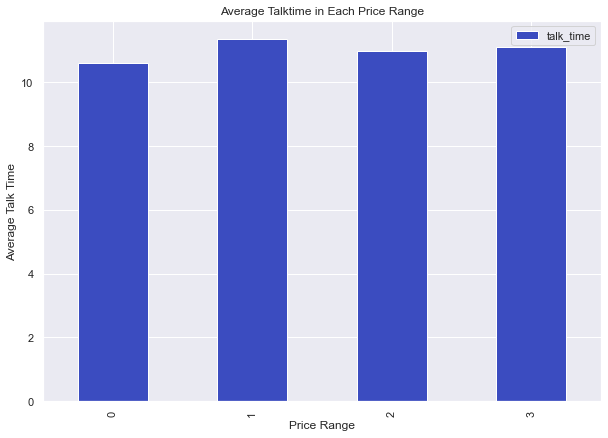

In [106]:
sns.set(rc={'figure.figsize':(10,7)})
bar_result_tt_per_pricer = result_avg_tt_per_pricer.plot(kind='bar', colormap = 'coolwarm')
bar_result_tt_per_pricer.set_title('Average Talktime in Each Price Range')
bar_result_tt_per_pricer.set_xlabel('Price Range')
bar_result_tt_per_pricer.set_ylabel('Average Talk Time')

Text(0.5, 1.0, 'Talk Time Boxplot in each price range')

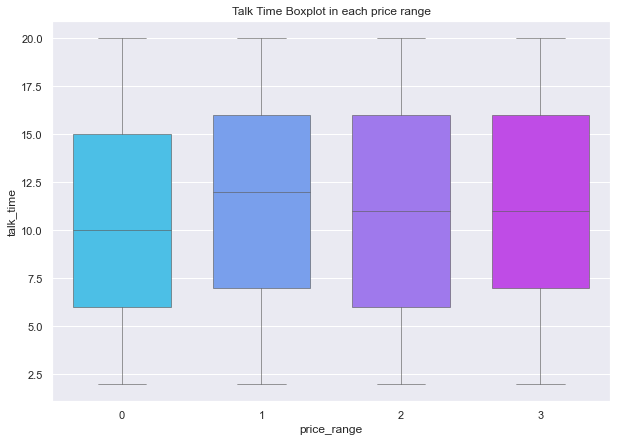

In [107]:
sns.boxplot(y=train['talk_time'], x=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Talk Time Boxplot in each price range')

Talk Time doesnt have too much effect on price

# 18.three_g
Has 3G or not

In [108]:
three_g = train['three_g'].value_counts()
three_g

1    1523
0     477
Name: three_g, dtype: int64

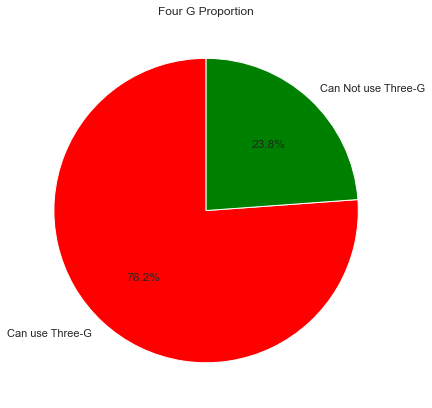

In [109]:
plt.figure(figsize=(7,7))
plt.title('Four G Proportion')
plt.pie(three_g, labels =['Can use Three-G', 'Can Not use Three-G'], autopct = '%1.1f%%',colors=['Red', 'Green'], startangle=90)
plt.show()

In [110]:
result_tg_per_pricer = train.groupby(by=[train['price_range'], train['three_g']])['three_g'].size().to_frame()
result_tg_per_pricer

three_g
price_range three_g         
0           0            127
            1            373
1           0            122
            1            378
2           0            113
            1            387
3           0            115
            1            385

In [111]:
result_tg_per_pricer1 = (pd.crosstab(index=train['price_range'], columns=train['three_g'], normalize='index')*100).round(2)
result_tg_per_pricer1

three_g,0,1
price_range,,
0,25.4,74.6
1,24.4,75.6
2,22.6,77.4
3,23.0,77.0


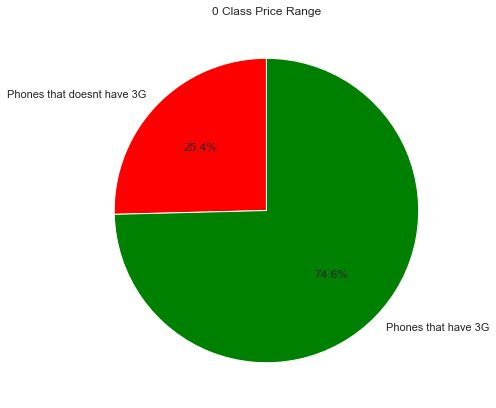

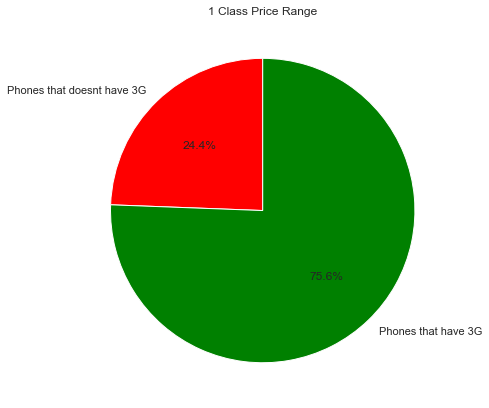

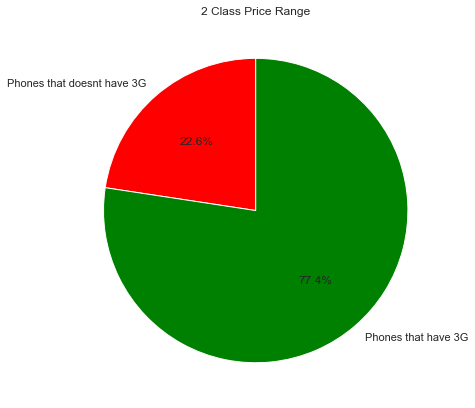

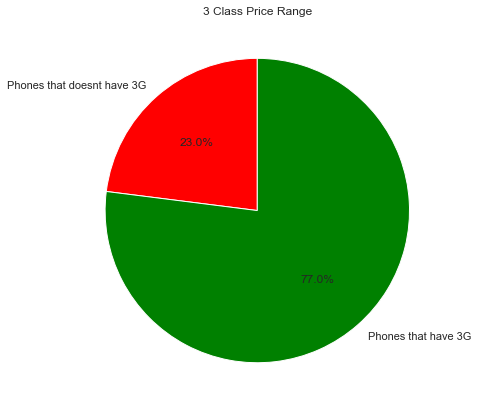

In [112]:
for i in groups_of_price:
    coba = train[train['price_range'] == i]
    result_tg_at_pricer = train.groupby(by=coba['three_g'])['three_g'].size()
    plt.title(f'{i} Class Price Range')
    plt.pie(result_tg_at_pricer, labels = ['Phones that doesnt have 3G', 'Phones that have 3G'], autopct = '%1.1f%%',colors=['Red','Green'], startangle=90)
    plt.show()

Text(0.5, 1.0, '3G Boxplot for every price range')

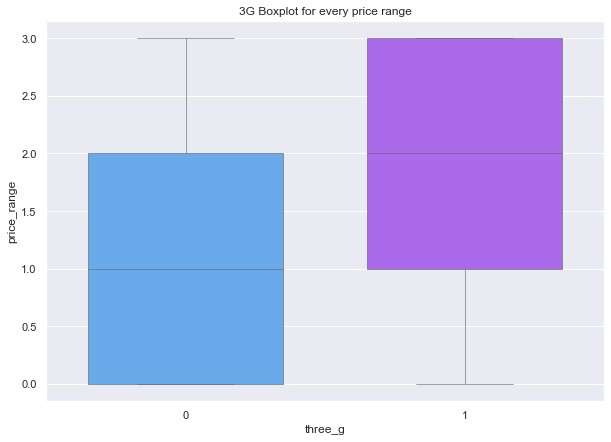

In [113]:
sns.boxplot(x=train['three_g'], y=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('3G Boxplot for every price range')

Phones that 3G enabled are more costlier than the other phones

# 19.touch_screen
Has touch screen or not

In [114]:
touch_screen = train['touch_screen'].value_counts()
touch_screen

1    1006
0     994
Name: touch_screen, dtype: int64

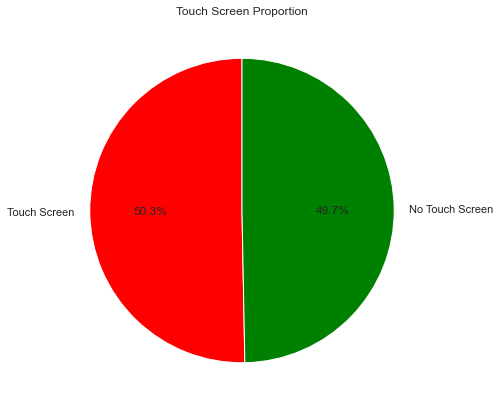

In [115]:
plt.figure(figsize=(7,7))
plt.title('Touch Screen Proportion')
plt.pie(touch_screen, labels =['Touch Screen', 'No Touch Screen'], autopct = '%1.1f%%',colors=['Red', 'Green'], startangle=90)
plt.show()

In [116]:
result_ts_per_pricer = train.groupby(by=[train['price_range'], train['touch_screen']])['touch_screen'].size().to_frame()
result_ts_per_pricer

touch_screen
price_range touch_screen              
0           0                      238
            1                      262
1           0                      239
            1                      261
2           0                      265
            1                      235
3           0                      252
            1                      248

In [117]:
result_ts_per_pricer1 = (pd.crosstab(index=train['price_range'], columns=train['touch_screen'], normalize='index')*100).round(2)
result_ts_per_pricer1

touch_screen,0,1
price_range,,
0,47.6,52.4
1,47.8,52.2
2,53.0,47.0
3,50.4,49.6


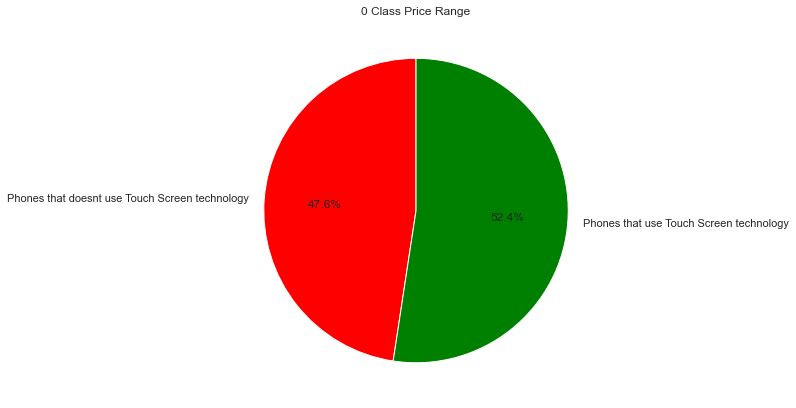

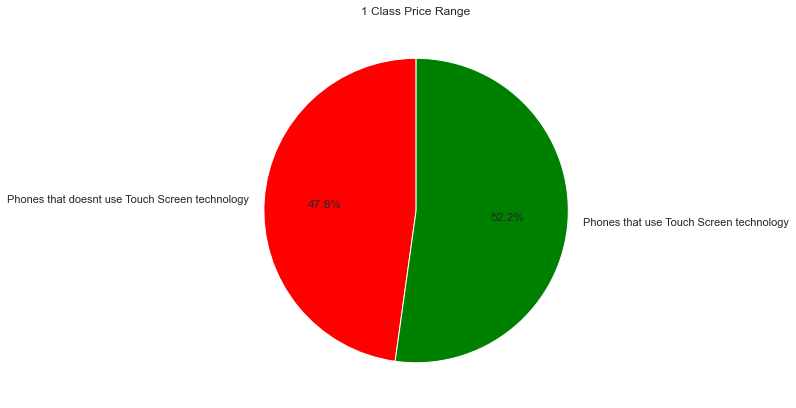

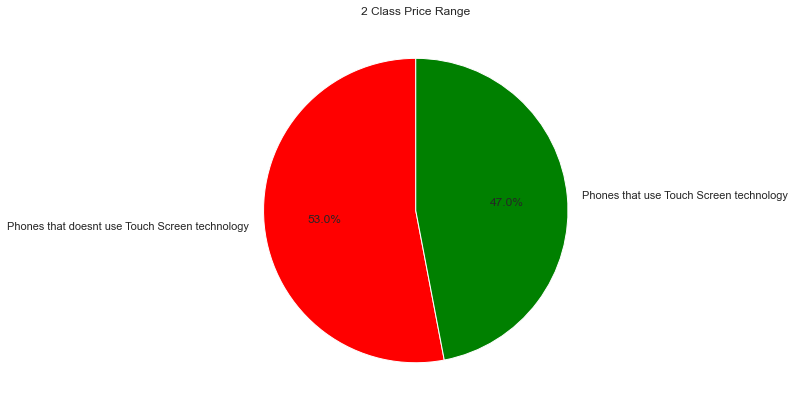

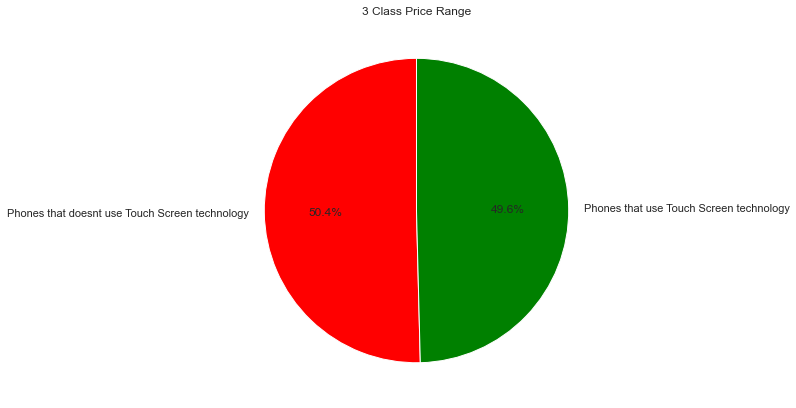

In [118]:
for i in groups_of_price:
    coba = train[train['price_range'] == i]
    result_ts_at_pricer = train.groupby(by=coba['touch_screen'])['touch_screen'].size()
    plt.title(f'{i} Class Price Range')
    plt.pie(result_ts_at_pricer, labels = ['Phones that doesnt use Touch Screen technology', 'Phones that use Touch Screen technology'], autopct = '%1.1f%%',colors=['Red','Green'], startangle=90)
    plt.show()

Text(0.5, 1.0, 'Touch Screen Boxplot for every price range')

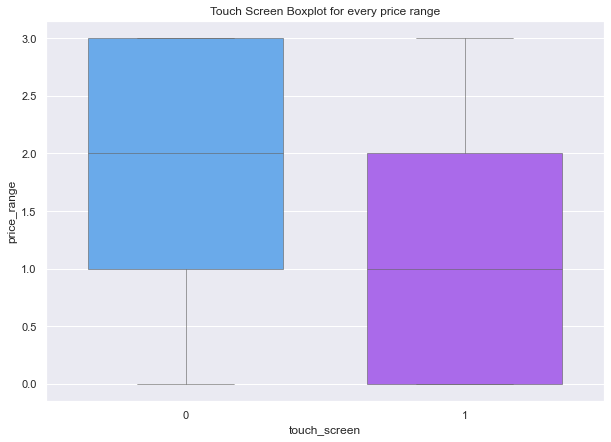

In [121]:
sns.boxplot(x=train['touch_screen'], y=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Touch Screen Boxplot for every price range')

Phones that Enables Touch Screen are CHEAPER than other phones

# 20.wifi
Has wifi or not

In [122]:
wifi = train['wifi'].value_counts()
wifi

1    1014
0     986
Name: wifi, dtype: int64

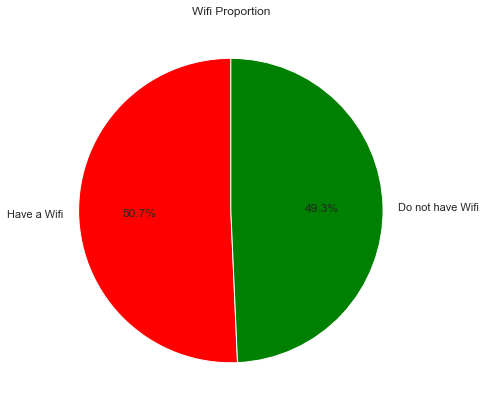

In [123]:
plt.figure(figsize=(7,7))
plt.title('Wifi Proportion')
plt.pie(wifi, labels =['Have a Wifi', 'Do not have Wifi'], autopct = '%1.1f%%',colors=['Red', 'Green'], startangle=90)
plt.show()

In [124]:
result_wf_per_pricer = train.groupby(by=[train['price_range'], train['wifi']])['wifi'].size().to_frame()
result_wf_per_pricer

wifi
price_range wifi      
0           0      252
            1      248
1           0      248
            1      252
2           0      248
            1      252
3           0      238
            1      262

In [125]:
result_wf_per_pricer1 = (pd.crosstab(index=train['price_range'], columns=train['wifi'], normalize='index')*100).round(2)
result_wf_per_pricer1

wifi,0,1
price_range,,
0,50.4,49.6
1,49.6,50.4
2,49.6,50.4
3,47.6,52.4


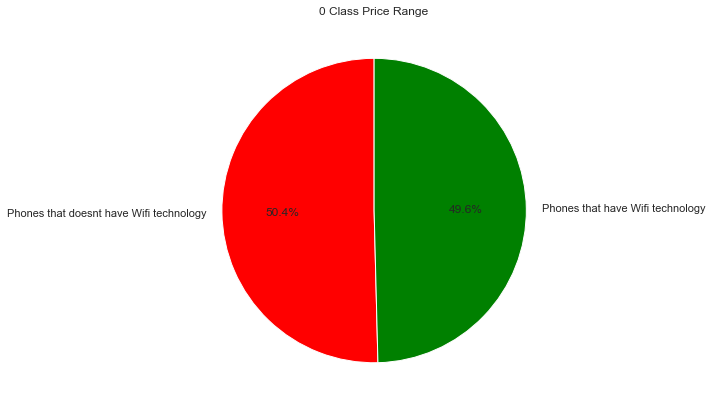

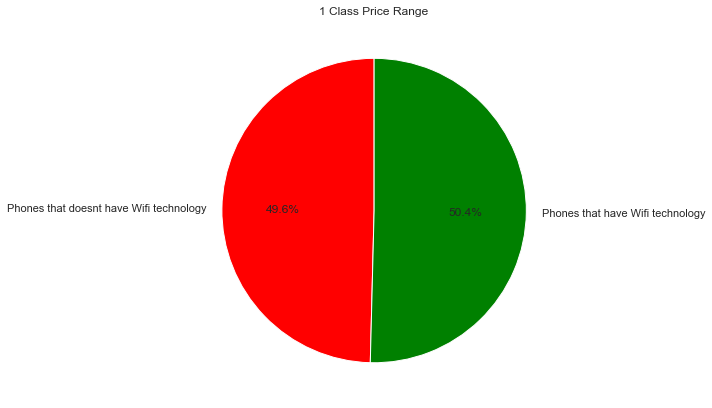

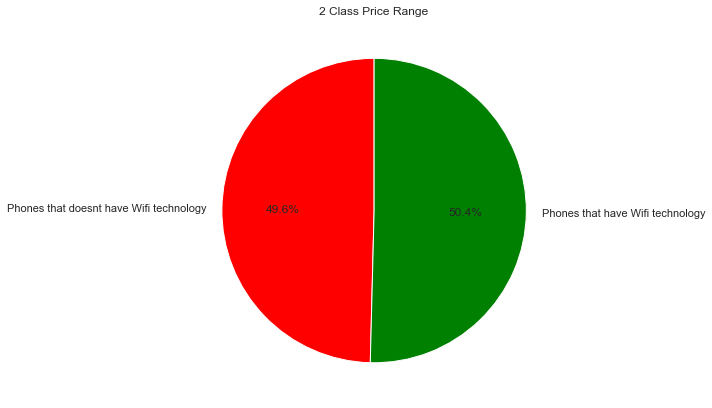

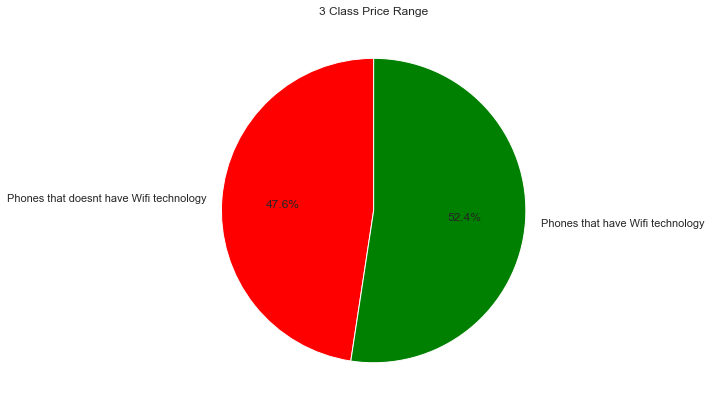

In [126]:
for i in groups_of_price:
    coba = train[train['price_range'] == i]
    result_wf_at_pricer = train.groupby(by=coba['wifi'])['wifi'].size()
    plt.title(f'{i} Class Price Range')
    plt.pie(result_wf_at_pricer, labels = ['Phones that doesnt have Wifi technology', 'Phones that have Wifi technology'], autopct = '%1.1f%%',colors=['Red','Green'], startangle=90)
    plt.show()

Text(0.5, 1.0, 'Wifi Boxplot for every price range')

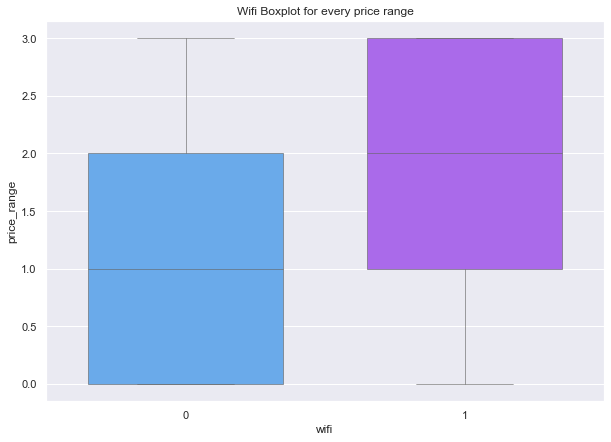

In [127]:
sns.boxplot(x=train['wifi'], y=train['price_range'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Wifi Boxplot for every price range')

Phones that are Wifi enabled are costlier than other phones

# Correlation

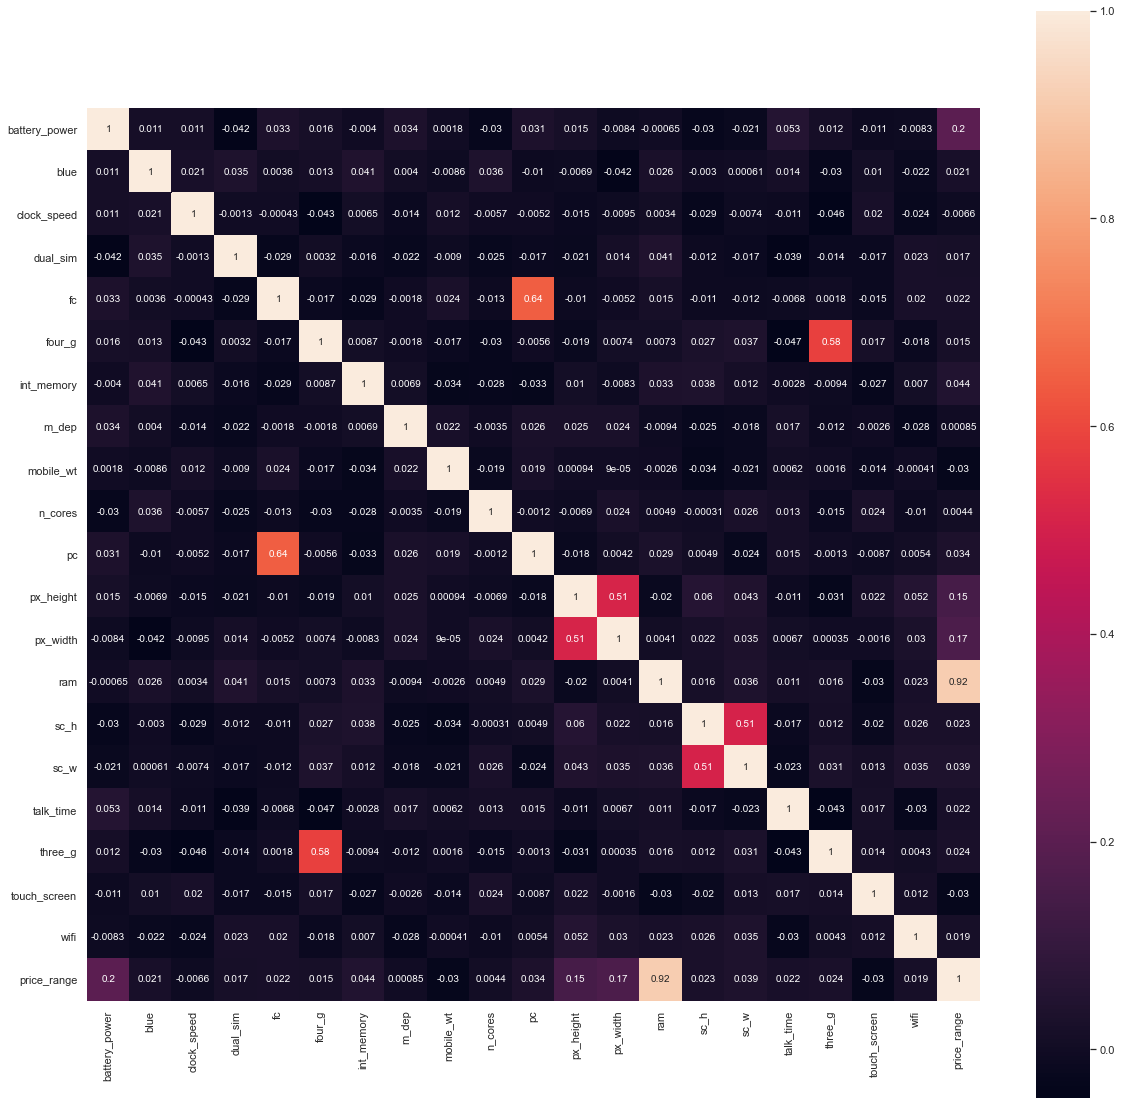

In [132]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, square=True,annot_kws={'size': 10})

In [230]:
high_corr = train.corr()['price_range'].sort_values(ascending=False)
high_corr

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

- RAM has a positive correlation with price range
- 4g and 3g features has a relation because most of phones which support 4g also supports 3g

# Data Preprocessing

In [168]:
# From the Analysis here are the top features that are going to be used to train our model
X = train[['three_g','battery_power','blue','dual_sim','four_g','px_height','px_width','ram','touch_screen','wifi','fc']]
y = train['price_range']
print("shape of x train is" ,X.shape)
print("shape of y train is" ,y.shape)

shape of x train is (2000, 11)
shape of y train is (2000,)


In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

# Splitting the Data

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("shape of x train is: ",X_train.shape)
print("shape of y test is-" ,y_test.shape)

shape of x train is:  (1400, 11)
shape of y test is- (600,)


# Building the Model

### Logistic Regression Algorithm

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [173]:
model_LogReg = LogisticRegression()

In [174]:
model_LogReg.fit(X_train, y_train)

LogisticRegression()

In [178]:
y_pred_LogReg_train = model_LogReg.predict(X_train)

In [180]:
acc_LogReg_train = accuracy_score(y_train, y_pred_LogReg_train)
acc_LogReg_train

0.9592857142857143

In [194]:
print(classification_report(y_train, y_pred_LogReg_train))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       358
           1       0.95      0.96      0.95       363
           2       0.95      0.93      0.94       334
           3       0.97      0.97      0.97       345

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.96      0.96      0.96      1400



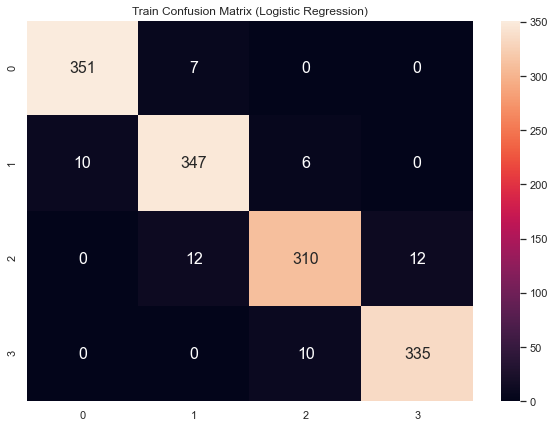

In [192]:
cm_LogReg_train = confusion_matrix(y_train, y_pred_LogReg_train)
df_LogReg_train = pd.DataFrame(data=cm_LogReg_train)
sns.heatmap(df_LogReg_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Train Confusion Matrix (Logistic Regression)')
plt.show()

In [175]:
y_pred_LogReg_test = model_LogReg.predict(X_test)

In [176]:
acc_LogReg_test = accuracy_score(y_test, y_pred_LogReg_test)
acc_LogReg_test

0.945

In [196]:
print(classification_report(y_test, y_pred_LogReg_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       142
           1       0.91      0.96      0.93       137
           2       0.93      0.91      0.92       166
           3       0.96      0.95      0.95       155

    accuracy                           0.94       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.94      0.95       600



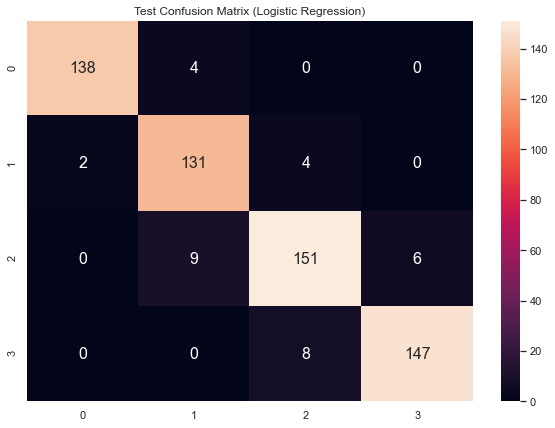

In [193]:
cm_LogReg_test = confusion_matrix(y_test, y_pred_LogReg_test)
df_LogReg_test = pd.DataFrame(data=cm_LogReg_test)
sns.heatmap(df_LogReg_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Test Confusion Matrix (Logistic Regression)')
plt.show()

### Support Vector Classifier

In [199]:
from sklearn.svm import SVC
model_SVC = SVC()

In [200]:
model_SVC.fit(X_train,y_train)

SVC()

In [201]:
y_pred_SVC_train = model_SVC.predict(X_train)

In [202]:
acc_SVC_train = accuracy_score(y_train, y_pred_SVC_train)
acc_SVC_train

0.9642857142857143

In [203]:
print(classification_report(y_train, y_pred_SVC_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       358
           1       0.96      0.96      0.96       363
           2       0.95      0.94      0.94       334
           3       0.97      0.97      0.97       345

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.96      0.96      0.96      1400



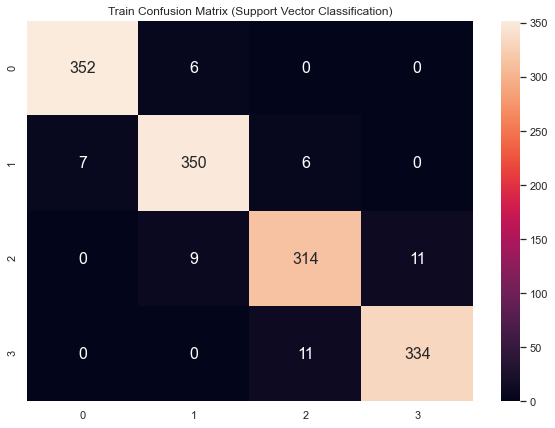

In [204]:
cm_SVC_train = confusion_matrix(y_train, y_pred_SVC_train)
df_SVC_train = pd.DataFrame(data=cm_SVC_train)
sns.heatmap(df_SVC_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Train Confusion Matrix (Support Vector Classification)')
plt.show()

In [205]:
y_pred_SVC_test = model_SVC.predict(X_test)

In [206]:
acc_SVC_test = accuracy_score(y_test, y_pred_SVC_test)
acc_SVC_test

0.8816666666666667

In [208]:
print(classification_report(y_test, y_pred_SVC_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       142
           1       0.81      0.92      0.86       137
           2       0.84      0.83      0.83       166
           3       0.93      0.86      0.90       155

    accuracy                           0.88       600
   macro avg       0.89      0.88      0.88       600
weighted avg       0.89      0.88      0.88       600



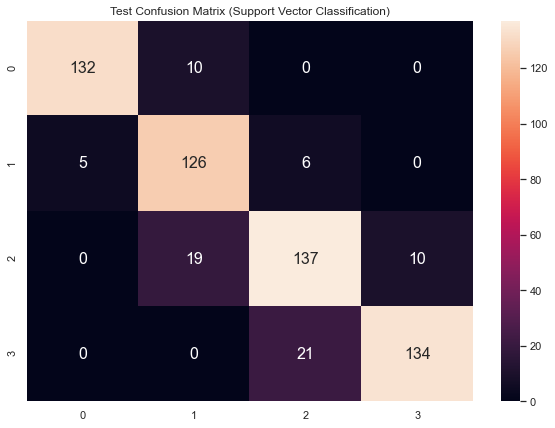

In [209]:
cm_SVC_test = confusion_matrix(y_test, y_pred_SVC_test)
df_SVC_test = pd.DataFrame(data=cm_SVC_test)
sns.heatmap(df_SVC_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Test Confusion Matrix (Support Vector Classification)')
plt.show()

### KNeighbors Classifier

In [210]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
model_KNN = KNeighborsClassifier()

In [212]:
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [214]:
y_pred_KNN_train = model_KNN.predict(X_train)

In [216]:
acc_KNN_train = accuracy_score(y_train, y_pred_KNN_train)
acc_KNN_train

0.7407142857142858

In [217]:
print(classification_report(y_train, y_pred_KNN_train))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       358
           1       0.63      0.71      0.67       363
           2       0.68      0.61      0.64       334
           3       0.90      0.77      0.83       345

    accuracy                           0.74      1400
   macro avg       0.75      0.74      0.74      1400
weighted avg       0.75      0.74      0.74      1400



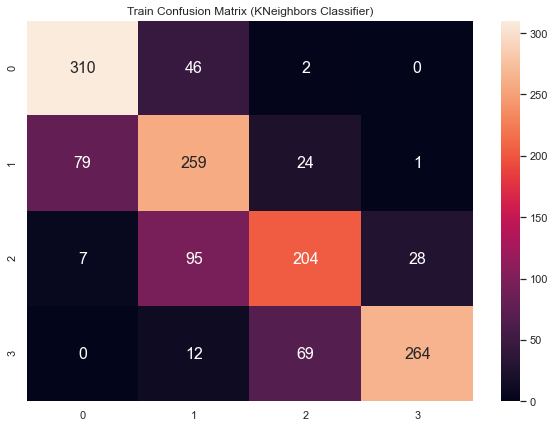

In [223]:
cm_KNN_train = confusion_matrix(y_train, y_pred_KNN_train)
df_KNN_train = pd.DataFrame(data=cm_KNN_train)
sns.heatmap(df_KNN_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Train Confusion Matrix (KNeighbors Classifier)')
plt.show()

In [219]:
y_pred_KNN_test = model_KNN.predict(X_test)

In [221]:
acc_KNN_test = accuracy_score(y_test, y_pred_KNN_test)
acc_KNN_test

0.5633333333333334

In [222]:
print(classification_report(y_test, y_pred_KNN_test))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       142
           1       0.40      0.54      0.46       137
           2       0.48      0.41      0.44       166
           3       0.75      0.57      0.64       155

    accuracy                           0.56       600
   macro avg       0.58      0.57      0.57       600
weighted avg       0.58      0.56      0.57       600



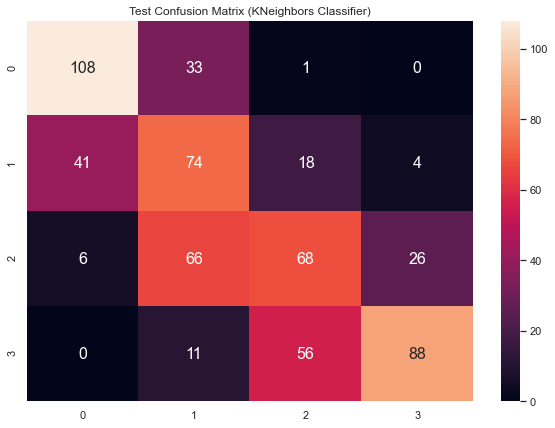

In [224]:
cm_KNN_test = confusion_matrix(y_test, y_pred_KNN_test)
df_KNN_test = pd.DataFrame(data=cm_KNN_test)
sns.heatmap(df_KNN_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Test Confusion Matrix (KNeighbors Classifier)')
plt.show()

In [229]:
data = {
    "LogReg (Train)" : [acc_LogReg_train],
    "LogReg (Test)" : [acc_LogReg_test],
    "SVC (Train)" : [acc_SVC_train],
    "SVC (Test)" : [acc_SVC_test],
    "KNN (Train)" : [acc_KNN_train],
    "KNN (Test)" : [acc_KNN_test]
    
}
pd.DataFrame(data=data, index=['Accuracy Score'])

,LogReg (Train),LogReg (Test),SVC (Train),SVC (Test),KNN (Train),KNN (Test)
Accuracy Score,0.959286,0.945,0.964286,0.881667,0.740714,0.563333


# CONCLUSION
accuracy is relevant because the dataset is BALANCED therefore we compare each models accuracy and obtain that Logistic Regression has the highest accuracy score.